In [164]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [165]:
df = pd.read_csv(("/Users/hannahjohnston/Downloads/archive (1)/2012-sat-results.csv")).set_index('SCHOOL NAME')
df = df.drop(columns=['DBN'])
df = df[df['Num of SAT Test Takers'].str.contains('s')==False]    
df = df.drop(columns=['Num of SAT Test Takers'])

        

In [166]:
df

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
SCHOOL NAME,,,
HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,355,404,363
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,383,423,366
EAST SIDE COMMUNITY SCHOOL,377,402,370
FORSYTH SATELLITE ACADEMY,414,401,359
MARTA VALLE HIGH SCHOOL,390,433,384
...,...,...,...
BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELLENCE,347,358,350
BUSHWICK COMMUNITY HIGH SCHOOL,359,317,358
P.S. Q811,429,444,433


In [167]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

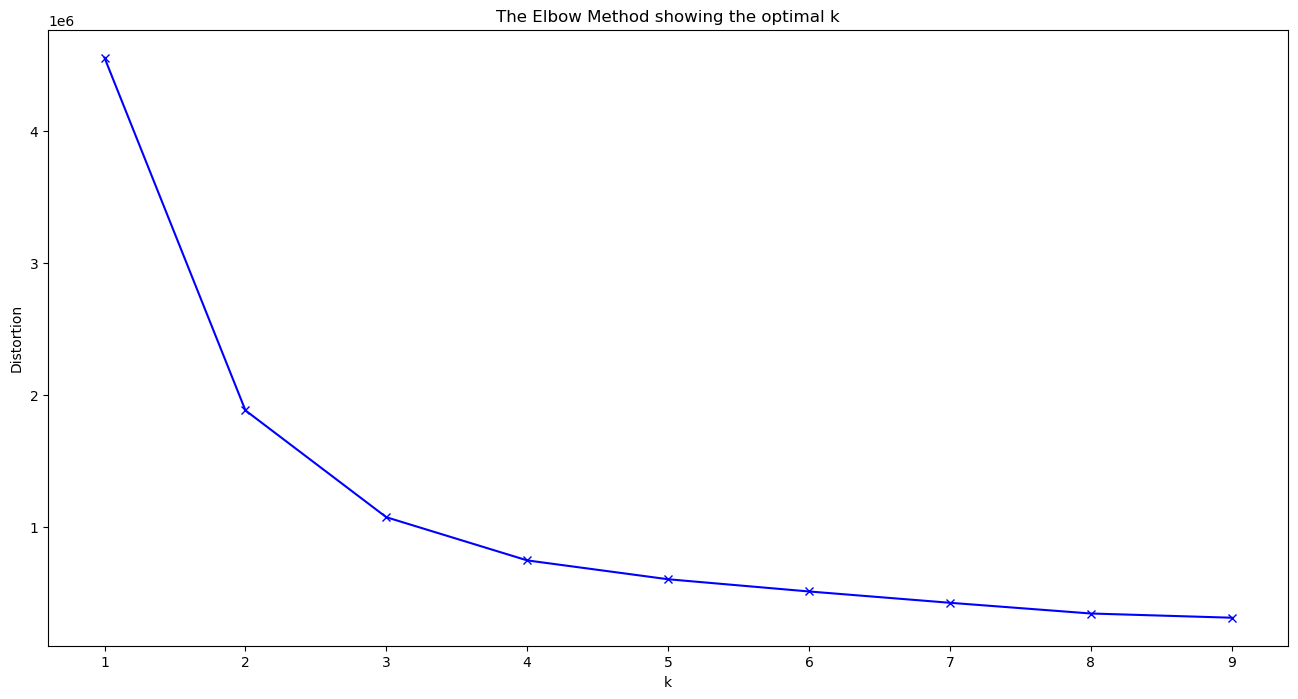

In [168]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [138]:
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters = k)
model.fit(df)

KMeans(n_clusters=3)

In [139]:
df["cluster"] = model.labels_

In [140]:
clustered_data = df[["cluster"]]

In [141]:
clustered_data

,cluster
SCHOOL NAME,
HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,0
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,0
EAST SIDE COMMUNITY SCHOOL,0
FORSYTH SATELLITE ACADEMY,0
MARTA VALLE HIGH SCHOOL,0
...,...
BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELLENCE,0
BUSHWICK COMMUNITY HIGH SCHOOL,0
P.S. Q811,2


In [163]:
clustered_data['cluster'].value_counts()

0    290
2    110
1     21
Name: cluster, dtype: int64